Run in the terminal:
```
pip install iplantuml
``` 

In [1]:
import iplantuml

Writing output for /home/jovyan/work/cd5759d2-6814-48a9-a19c-27b9ba6471fa.uml to cd5759d2-6814-48a9-a19c-27b9ba6471fa.svg


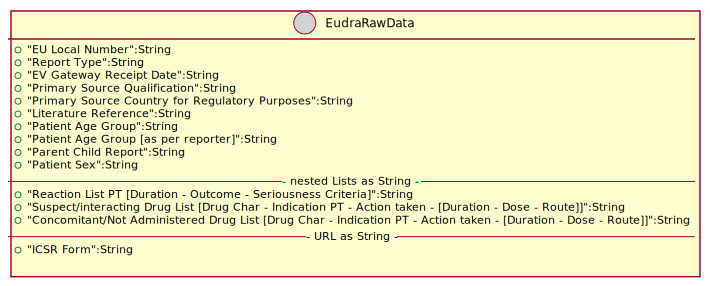

In [2]:
%%plantuml 
@startuml

class EudraRawData << (📁,lightgrey) >> {
    + "EU Local Number":String
    + "Report Type":String
    + "EV Gateway Receipt Date":String
    + "Primary Source Qualification":String
    + "Primary Source Country for Regulatory Purposes":String
    + "Literature Reference":String
    + "Patient Age Group":String
    + "Patient Age Group [as per reporter]":String
    + "Parent Child Report":String
    + "Patient Sex":String
--- nested Lists as String ---
    +  {abstract}"Reaction List PT [Duration – Outcome - Seriousness Criteria]":String
    +  {abstract}"Suspect/interacting Drug List [Drug Char - Indication PT - Action taken - [Duration - Dose - Route]]":String
    +  {abstract} "Concomitant/Not Administered Drug List [Drug Char - Indication PT - Action taken - [Duration - Dose - Route]]":String
--- URL as String ---
    + "ICSR Form":String

}
@enduml 

Writing output for /home/jovyan/work/9cfa59d3-2a59-4379-8437-dcec2c545a46.uml to 9cfa59d3-2a59-4379-8437-dcec2c545a46.svg


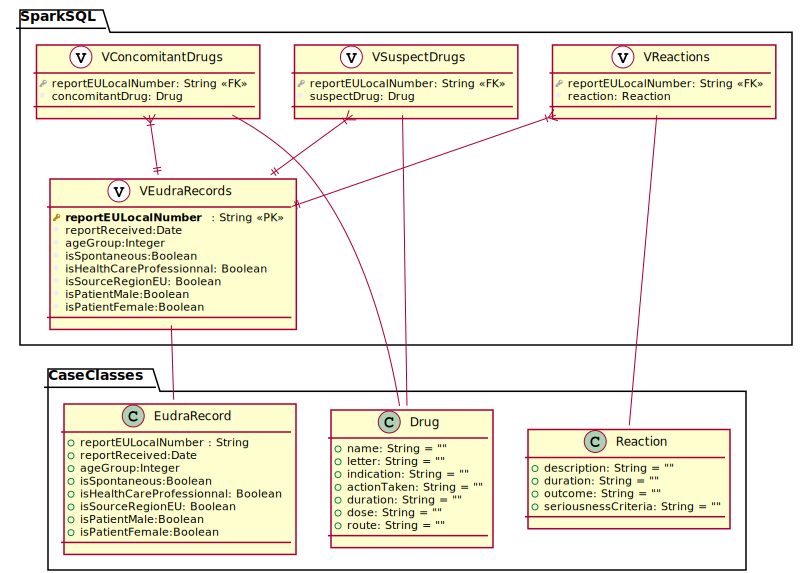

In [3]:
%%plantuml
@startuml

!define primary_key(x) <b><color:#b8861b><&key></color> x</b>
!define foreign_key(x) <color:#aaaaaa><&key></color> x
!define column(x) <color:#efefef><&media-record></color> x
!define table(x) entity x << (V, white) >>

package CaseClasses {

class Reaction{
    + description: String = ""
    + duration: String = ""
    + outcome: String = ""
    + seriousnessCriteria: String = ""
}
class Drug{
  + name: String = ""
  + letter: String = ""
  + indication: String = ""
  + actionTaken: String = ""
  + duration: String = ""
  + dose: String = ""
  + route: String = "" 
}


class EudraRecord{
    + reportEULocalNumber : String 
    + reportReceived:Date 
    + ageGroup:Integer
    + isSpontaneous:Boolean
    + isHealthCareProfessionnal:  Boolean 
    + isSourceRegionEU: Boolean 
    + isPatientMale:Boolean
    + isPatientFemale:Boolean
}
}



package SparkSQL {
table( VConcomitantDrugs ) {
  foreign_key( reportEULocalNumber ): String  <<FK>>
  column( concomitantDrug ): Drug 

}

table( VSuspectDrugs ) {
  foreign_key( reportEULocalNumber ): String  <<FK>>
  column( suspectDrug ): Drug 
}
table( VReactions ) {
  foreign_key( reportEULocalNumber ): String  <<FK>>
  column( reaction ): Reaction
}

table( VEudraRecords ) {
  primary_key( reportEULocalNumber ): String  <<PK>>
  column( reportReceived):Date 
  column( ageGroup):Integer
  column( isSpontaneous):Boolean
  column( isHealthCareProfessionnal):  Boolean 
  column( isSourceRegionEU): Boolean 
  column( isPatientMale):Boolean
  column( isPatientFemale):Boolean  
    
}
VConcomitantDrugs }|--||VEudraRecords
VSuspectDrugs}|--||VEudraRecords
VReactions}|--||VEudraRecords
}

VConcomitantDrugs -- Drug
VSuspectDrugs -- Drug
VReactions -- Reaction
VEudraRecords -- EudraRecord


@enduml